# Delicious Asian and Indian Cuisines 

In [12]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
import numpy as np
from imblearn.over_sampling import SMOTE

In [3]:
df = pd.read_csv("../data/cuisines.csv")
df.head()

,Unnamed: 0,cuisine,almond,angelica,anise,anise_seed,apple,apple_brandy,apricot,armagnac,...,whiskey,white_bread,white_wine,whole_grain_wheat_flour,wine,wood,yam,yeast,yogurt,zucchini
0,65,indian,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,66,indian,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,67,indian,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,68,indian,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,69,indian,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0


<Axes: xlabel='cuisine'>

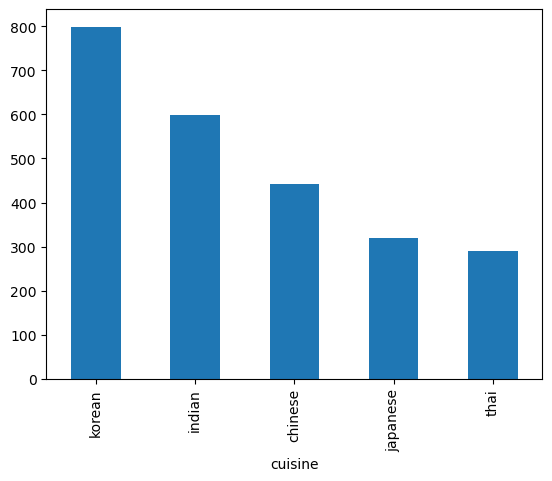

In [4]:
df["cuisine"].value_counts().plot(kind="bar")


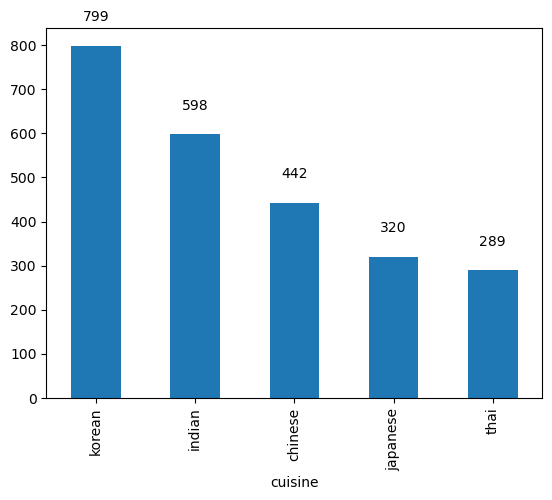

In [5]:
import matplotlib.pyplot as plt

# Get value counts
value_counts = df["cuisine"].value_counts()

# Create bar plot
ax = value_counts.plot(kind="bar")

# Display the number of value counts on top of each bar
for i, v in enumerate(value_counts):
    ax.text(i, v + 50, str(v), ha="center", va="bottom")

plt.show()

In [8]:
# create an ingredient dataframe.
# This function will start by dropping an unhelpful column and sort through ingredients by their count:
def create_ingredient_df(df):
    ingredient_df = df.T.drop(["cuisine", "Unnamed: 0"]).sum(axis=1).to_frame("value")
    ingredient_df = ingredient_df[(ingredient_df.T != 0).any()]
    ingredient_df = ingredient_df.sort_values(
        by="value", ascending=False, inplace=False
    )
    ingredient_df.head(10).plot.barh()
    return ingredient_df

In [9]:
# DataFrames by cuisine
thai_df = df[(df.cuisine == "thai")]
japanese_df = df[(df.cuisine == "japanese")]
chinese_df = df[(df.cuisine == "chinese")]
indian_df = df[(df.cuisine == "indian")]
korean_df = df[(df.cuisine == "korean")]

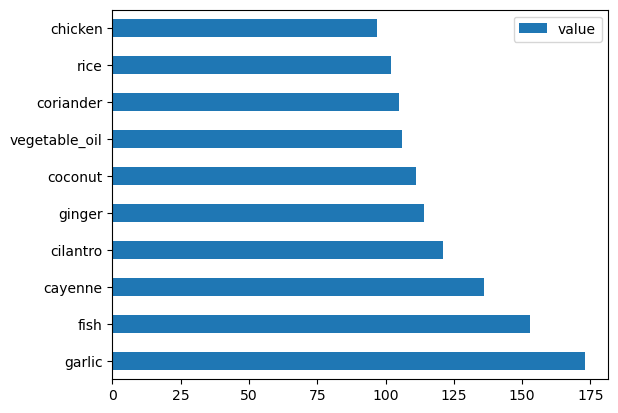

In [10]:
thai_ingredient_df = create_ingredient_df(thai_df)


In [13]:
# remove the three most common ingredients of all cuisines
feature_df = df.drop(["cuisine", "Unnamed: 0", "rice", "garlic", "ginger"], axis=1)
labels_df = df.cuisine
feature_df.head()

,almond,angelica,anise,anise_seed,apple,apple_brandy,apricot,armagnac,artemisia,artichoke,...,whiskey,white_bread,white_wine,whole_grain_wheat_flour,wine,wood,yam,yeast,yogurt,zucchini
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0


# Balance the dataset

In [14]:
oversample = SMOTE()
transformed_feature_df, transformed_label_df = oversample.fit_resample(
    feature_df, labels_df
)

In [15]:
print(f"old label count: {df.cuisine.value_counts()}")
print(f"new label count: {transformed_label_df.value_counts()}")


old label count: cuisine
korean      799
indian      598
chinese     442
japanese    320
thai        289
Name: count, dtype: int64
new label count: cuisine
indian      799
thai        799
chinese     799
japanese    799
korean      799
Name: count, dtype: int64


In [16]:
transformed_df = pd.concat(
    [transformed_label_df, transformed_feature_df], axis=1, join="outer"
)
transformed_df.to_csv("../data/transformed_cuisines.csv")